This code below sets up the data so it can be used by Pandas. The data used in here is the location of all the waste recovery locations in Allegheny county. Because our overall metric to determine the "best" neighborhood is by measuring the environmental cleanliness of each neighborhood, the more waste recovery locations available, the more likely that the neighborhood is to be clean and free of litter. 

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
data = pd.read_csv("https://data.wprdc.org/datastore/dump/51f0c4f3-0ddd-4073-8f39-ad19d7528575")

This code below filters out the the waste locations that have no location associated with them because without the neighborhood designation, the data is useless to us. I then just displayed the first 10 locations within the list.

In [3]:
data_filtered = data[data['neighborhood'].notnull()]

In [4]:
data_filtered.head(10)

,id,name,address_number,street,city,hours_of_operation,notes,phone_number,website,managed_by_city,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
2,2029078673,Advance Auto Parts - East Liberty,5905.0,Station St,Pittsburgh,7:30 a.m. - 9:00 p.m. Monday - Saturday 9:00 a...,NaN,412-661-7050,https://shop.advanceautoparts.com/o/storeservi...,f,...,East Liberty,9.0,11.0,42003111500,2.0,11.0,5.0,3-8,40.464459,-79.924964
4,1160745337,Allegheny County Health Department,3901.0,Penn Ave,Pittsburgh,"8:00 a.m. - 4:00 p.m., Monday - Friday",NaN,412-578-8390,NaN,f,...,Lower Lawrenceville,7.0,6.0,42003060300,2.0,6.0,2.0,3-3,40.465420,-79.959001
5,758154727,Appliance Warehouse,504.0,Bingham St,Pittsburgh,"9:00 a.m. - 5:00 p.m., Monday - Saturday",NaN,412-247-4460,NaN,f,...,South Side Flats,3.0,17.0,42003170200,3.0,17.0,3.0,4-2,40.429444,-79.994381
12,1276055567,CCI Center Drop Box,64.0,Sarah St,Pittsburgh,"8:30 a.m. - 5:00 p.m., Monday - Friday",Located in Lobby,412-488-7490,NaN,f,...,South Side Flats,3.0,17.0,42003170200,3.0,17.0,3.0,4-24,40.427840,-79.984331
13,363498631,City-County Building Drop Box,526.0,4th Ave,Pittsburgh,8:30 a.m. - 4:30 p.m.,Located in Lobby,NaN,NaN,t,...,Central Business District,6.0,1.0,42003020100,6.0,1.0,2.0,1-4,40.437980,-79.996931
14,852485030,Construction Junction,200.0,N Lexington Ave,Pittsburgh,"9:00 a.m. - 6:00 p.m., Monday - Friday 9:00 a....",Call or visit their webpage to confirm the req...,412-243-5025,https://www.cjreuse.org/donate/what-we-accept/,f,...,Point Breeze North,9.0,14.0,42003140500,2.0,14.0,4.0,3-14,40.449708,-79.897862
15,1876149639,Construction Junction Drop Off Partner Site,7235.0,Meade St,Pittsburgh,"9:00 a.m. - 6:00 p.m., Monday - Friday 9:00 a....","Does NOT Accept Yard Debris, Scrap Metal or Tires",412-243-5025,NaN,t,...,Point Breeze North,9.0,14.0,42003140500,2.0,14.0,4.0,3-14,40.449635,-79.898908
17,1373153417,Evolution E-Cycling,2235.0,Mary St,Pittsburgh,"9:00 a.m. - 5:00 p.m., Monday - Friday",Fees May Apply,412-390-3450,http://www.evolutionecycling.com/services/elec...,f,...,South Side Flats,3.0,16.0,42003160900,3.0,16.0,3.0,4-24,40.425890,-79.973601
19,871457761,Giant Eagle - Greenfield,4239.0,Murray Ave,Pittsburgh,"6:00 a.m. - 12:00 a.m., Daily","Must be empty, clean and dry. Call to confirm ...",(412) 421-6472,NaN,f,...,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15,40.422020,-79.928909
20,416304083,Giant Eagle - Shadyhill Plaza,6320.0,Shakespeare St,Pittsburgh,"6:00 a.m. - 12:00 a.m., Daily","Must be empty, clean and dry. Call to confirm ...",(412) 361-6220,NaN,f,...,Shadyside,8.0,7.0,42003070800,2.0,7.0,4.0,3-13,40.458730,-79.921011


I then sorted the in descending order (so the highest value is on top) by count of waste recovery locations per neighborhood. I was suprised to see that South Side took first place for the most locations. I was also suprised to see how many neighborhoods either had 0 or only 1.

In [7]:
data_filtered['neighborhood'].value_counts().sort_values(ascending=False)

South Side Flats             6
Shadyside                    4
East Liberty                 3
Point Breeze North           3
Chateau                      2
Strip District               2
Lincoln-Lemington-Belmar     1
Central Northside            1
Upper Lawrenceville          1
Central Business District    1
Squirrel Hill South          1
Homewood West                1
Lower Lawrenceville          1
Hazelwood                    1
Greenfield                   1
East Allegheny               1
Elliott                      1
Beltzhoover                  1
Name: neighborhood, dtype: int64

This displays a simple bar graph with the neighborhoods on the x-axis and the count of the locations on the y-axis, in no particular order

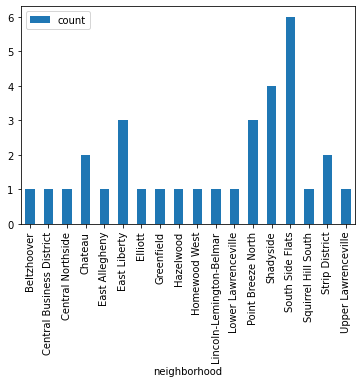

In [8]:
data_filtered_count = data_filtered.groupby("neighborhood")['id'].count().to_frame().reset_index()
data_filtered_count.columns = ["neighborhood", "count"]
data_filtered_count.plot(kind = "bar", x = "neighborhood")

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

This displays a map of Allegheny county with a color gradient to represent the number of waste recovery locations per county. The light grey areas are the areas that have no waste recovery location associated with them which as you can see is actually a lot more than I think most people would have expected.

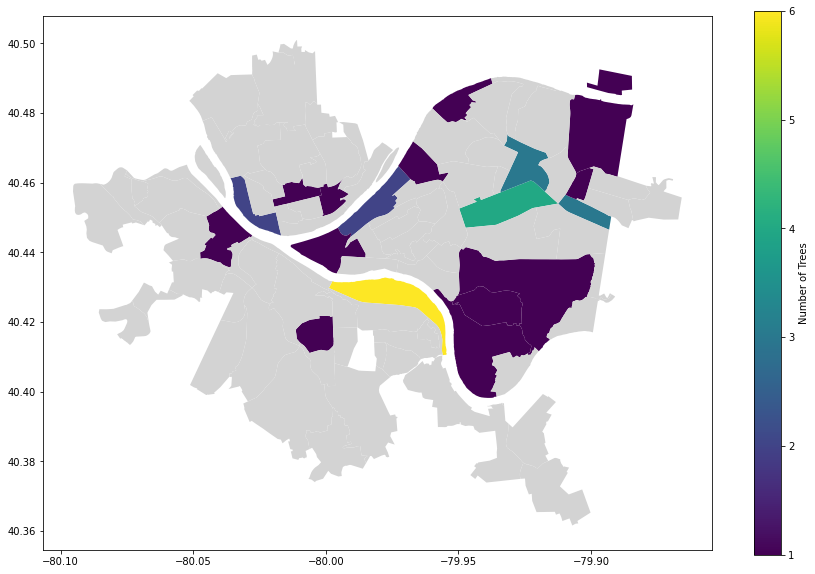

In [10]:
wasteMap = neighborhoods.merge(data_filtered_count, how = 'left', left_on = 'hood', right_on = 'neighborhood')
wasteMap.plot(column = "count",
             cmap = "viridis",
             legend = True,
             legend_kwds = {'label': "Number of Waste of Recovery Locations"},
             figsize = (15,10),
             missing_kwds = {"color": "lightgrey"})

This code below gives a relative score from 0 to 1 for each neighborhood so that way it can be used along with the other data sets to develop a total metric that determines the offical "best" or most environmental neighborhood in our case. The formula used to determine the score is a simple algorithim using the maximum and minimum values to calculate the score.

In [13]:
maxWaste = data_filtered_count.max()['count']
minWaste = 0
wasteScores = data_filtered_count['count'].map(lambda x : ((x - minWaste) / (maxWaste - minWaste)))
data_filtered_count['score'] = wasteScores
data_filtered_count.head()

,neighborhood,count,score
0,Beltzhoover,1,0.166667
1,Central Business District,1,0.166667
2,Central Northside,1,0.166667
3,Chateau,2,0.333333
4,East Allegheny,1,0.166667


This then displays a map of Allegheny county but this time rather than using the number of locations it uses the score for each neighborhood, but it still looks the same as the other map like it should because the relative differences between each neighborhood are still the same.

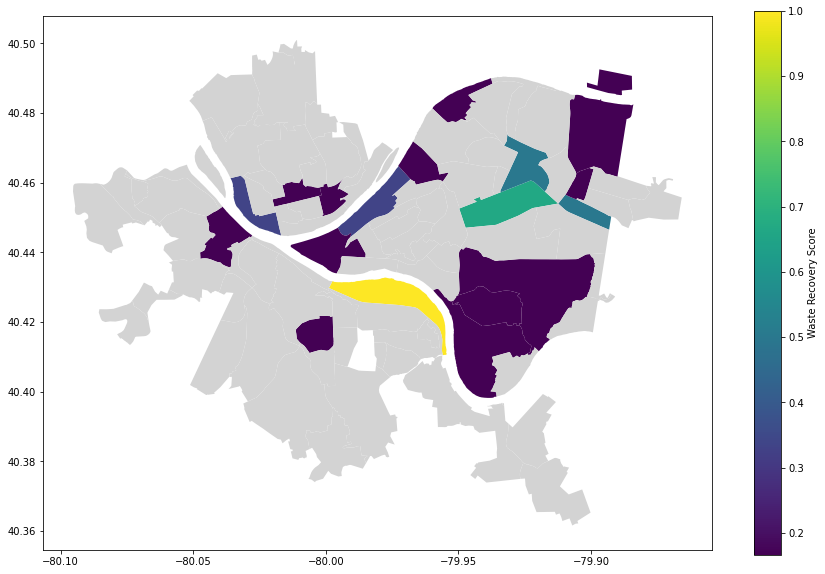

In [14]:
wasteMap = neighborhoods.merge(data_filtered_count, how = 'left', left_on = 'hood', right_on = 'neighborhood')
wasteMap.plot(column = "score",
             cmap = "viridis",
             legend = True,
             legend_kwds = {'label': "Waste Recovery Score"},
             figsize = (15,10),
             missing_kwds = {"color": "lightgrey"})

In conclusion , when looking at just the waste recovery locations in Allegheny county, it is very easy to see that the South Side neighborhood is the clear winner. With there being so a lot of people there and a hot spot to visit, it makes sense that there is a need for a lot of locations to recover waste. In general the East side of Allegheny county appears to have a significant amount more of locations than the west side and there doesn't seem to be a clear reason as to why this is the case. However though, with some places being a little less urban than others, it would make sense that there wouldn't be as much of a need for waste recovery locations and maybe some of the neighborhoods dump their waste in other ones that contain a lot more locations.

## Natural Environment Conditions: Park Space

When deciding which Pittsburgh neighborhood is the most environmentally friendly, it's important to know how many parks / natural spaces there are. We're going to look at a data set that includes the park space, in acres, per 1000 people in each neighborhood.

In [1]:
natural_data = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/14501cb9-308d-49ce-8bbb-7933ad703fe1/download/natural-environment-conditions.csv")

NameError: name 'pd' is not defined